+----------+---------------------+---------------------+-----------------------+
| Problem  |       inbuilt       |     my function     |     Relative Error    |
+----------+---------------------+---------------------+-----------------------+
| 3(a)(i)  | 0.05503416527935989 | 0.05503375768661485 | 7.406176562730459e-06 |
| 3(a)(ii) |  1.5373769473726524 |  1.5373769470625294 |   0.3978454358651116  |
|   3(b)   |  4.046204673660418  |  4.046204673660199  | 5.399921874158954e-14 |
+----------+---------------------+---------------------+-----------------------+



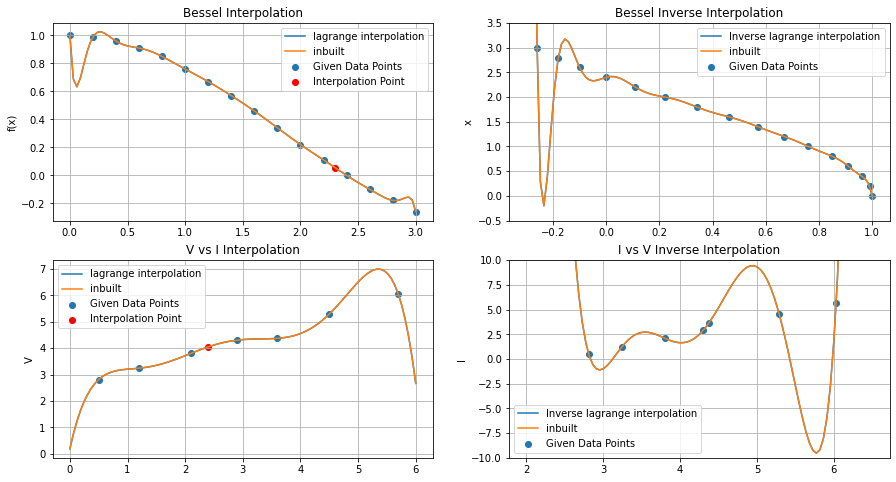

In [35]:
import numpy as np
from prettytable import PrettyTable
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from sympy import Symbol
def Lagrange(x, L_x, L_y,y = 0):
  m = len(L_x)   
  for i in range(0, m):
    prod_i = 1
    for j in range(m):
      if i==j:
        continue
      else:
        prod_i = prod_i*(x - L_x[j])/(L_x[i] - L_x[j])
    y = y + L_y[i]*prod_i
  return y
def Lagrange_inverse(y,L_x,L_y,x=0):
    return Lagrange(y,L_y,L_x,x=0)
def inbuilt(x, L_x, L_y):
    poly = lagrange(L_x, L_y) 
    L=poly(x)
    return L    
L1 = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
L2 = [1.0, 0.99, 0.96, 0.91, 0.85, 0.76, 0.67, 0.57, 0.46, 0.34, 0.22, 0.11, 0.00, -0.10, -0.18, -0.26]

I = [2.81, 3.24, 3.80, 4.30, 4.37, 5.29, 6.03]
V = [0.5, 1.2, 2.1, 2.9, 3.6, 4.5, 5.7]
mytable = PrettyTable(["Problem" , "inbuilt", "my function","Relative Error"])
mytable.add_rows([["3(a)(i)",inbuilt(2.3, L1, L2),Lagrange(2.3, L1, L2),
                   (inbuilt(2.3, L1, L2)-Lagrange(2.3, L1, L2))/inbuilt(2.3, L1, L2)],
                  ["3(a)(ii)",inbuilt(0.5, L2,L1),Lagrange(0.5, L2, L1,y = 0),
                   (inbuilt(0.5, L2,L1)-Lagrange(0.5, L1, L2,y = 0))/inbuilt(0.5, L2,L1)],
                  ["3(b)",inbuilt(2.4, V,I),Lagrange(2.4, V,I),
                   (inbuilt(2.4, V,I)-Lagrange(2.4, V,I))/inbuilt(2.4, V,I)]])
print(mytable, end="\n\n")
xrange = np.linspace(0.0,3.0,100,float)
bes_inb,bes_inb_inv,lag_bes,lag_bes_inv,lin_inb,lin_inb_inv,lin_lag,lin_lag_inv= [],[],[],[],[],[],[],[]
for i in xrange:
  bes_inb.append(inbuilt(i, L1, L2))
  lag_bes.append(Lagrange(i, L1, L2))
x1range = np.linspace(0.0,6.0,100,float)
for i in x1range:
  lin_inb.append(inbuilt(i, V,I))
  lin_lag.append(Lagrange(i, V,I))
x2range = np.linspace(1.0,-0.3,100,float)
for i in x2range:
    bes_inb_inv.append(inbuilt(i, L2,L1))
    lag_bes_inv.append(Lagrange(i, L2, L1,y = 0))
x3range = np.linspace(2.0,6.5,100,float)
for i in x3range:
    lin_inb_inv.append(inbuilt(i, I,V))
    lin_lag_inv.append(Lagrange(i,I,V,y = 0))
    
fig,axs=plt.subplots(2,2,figsize=(15,8))
ax11,ax12,ax21,ax22=axs[0][0],axs[0][1],axs[1][0],axs[1][1]
ax11.plot(xrange,lag_bes,label="lagrange interpolation"),ax11.plot(xrange,bes_inb,label="inbuilt")
ax11.scatter(L1,L2,label="Given Data Points"),ax11.scatter(2.3,Lagrange(2.3, L1, L2),label="Interpolation Point",c='red')
ax11.set_title("Bessel Interpolation"),ax11.set_ylabel("f(x)")
ax12.plot(x2range,lag_bes_inv,label="Inverse lagrange interpolation"),ax12.plot(x2range,bes_inb_inv,label="inbuilt")
ax12.scatter(L2,L1,label="Given Data Points"),ax12.set_ylabel("x")
ax12.set_ylim([-0.5,3.5]), ax12.set_title("Bessel Inverse Interpolation")
ax21.plot(x1range,lin_lag,label="lagrange interpolation"),ax21.plot(x1range,lin_inb,label="inbuilt")
ax21.scatter(V,I,label="Given Data Points"),ax21.scatter(2.4,Lagrange(2.4, V, I),label="Interpolation Point",c='red')
ax21.set_title("V vs I Interpolation"),ax21.set_ylabel("V")
ax22.plot(x3range,lin_inb_inv,label="Inverse lagrange interpolation"),ax22.plot(x3range,lin_lag_inv,label="inbuilt")
ax22.scatter(I,V,label="Given Data Points"),ax22.set_title("I vs V Inverse Interpolation")
ax22.set_ylim([-10,10]),ax22.set_ylabel("I")
ax11.legend(),ax11.grid(True),ax12.legend(),ax12.grid(True),ax21.legend(),ax21.grid(True),ax22.legend(),ax22.grid(True)
plt.show()